Imports

In [93]:
import math, matplotlib.pyplot as plt, numpy
from matplotlib.animation import FuncAnimation

Exercitiul 1

Matrice Fouriere F de 8x8 normalizata:
 [[ 0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j          0.35355339+0.j
   0.35355339+0.j          0.35355339+0.j        ]
 [ 0.35355339+0.j          0.25      -0.25j        0.        -0.35355339j
  -0.25      -0.25j       -0.35355339+0.j         -0.25      +0.25j
   0.        +0.35355339j  0.25      +0.25j      ]
 [ 0.35355339+0.j          0.        -0.35355339j -0.35355339+0.j
   0.        +0.35355339j  0.35355339+0.j          0.        -0.35355339j
  -0.35355339+0.j          0.        +0.35355339j]
 [ 0.35355339+0.j         -0.25      -0.25j        0.        +0.35355339j
   0.25      -0.25j       -0.35355339+0.j          0.25      +0.25j
   0.        -0.35355339j -0.25      +0.25j      ]
 [ 0.35355339+0.j         -0.35355339+0.j          0.35355339+0.j
  -0.35355339+0.j          0.35355339+0.j         -0.35355339+0.j
   0.35355339+0.j         -0.35355339+0.j        ]
 [ 0.35355339+0.j

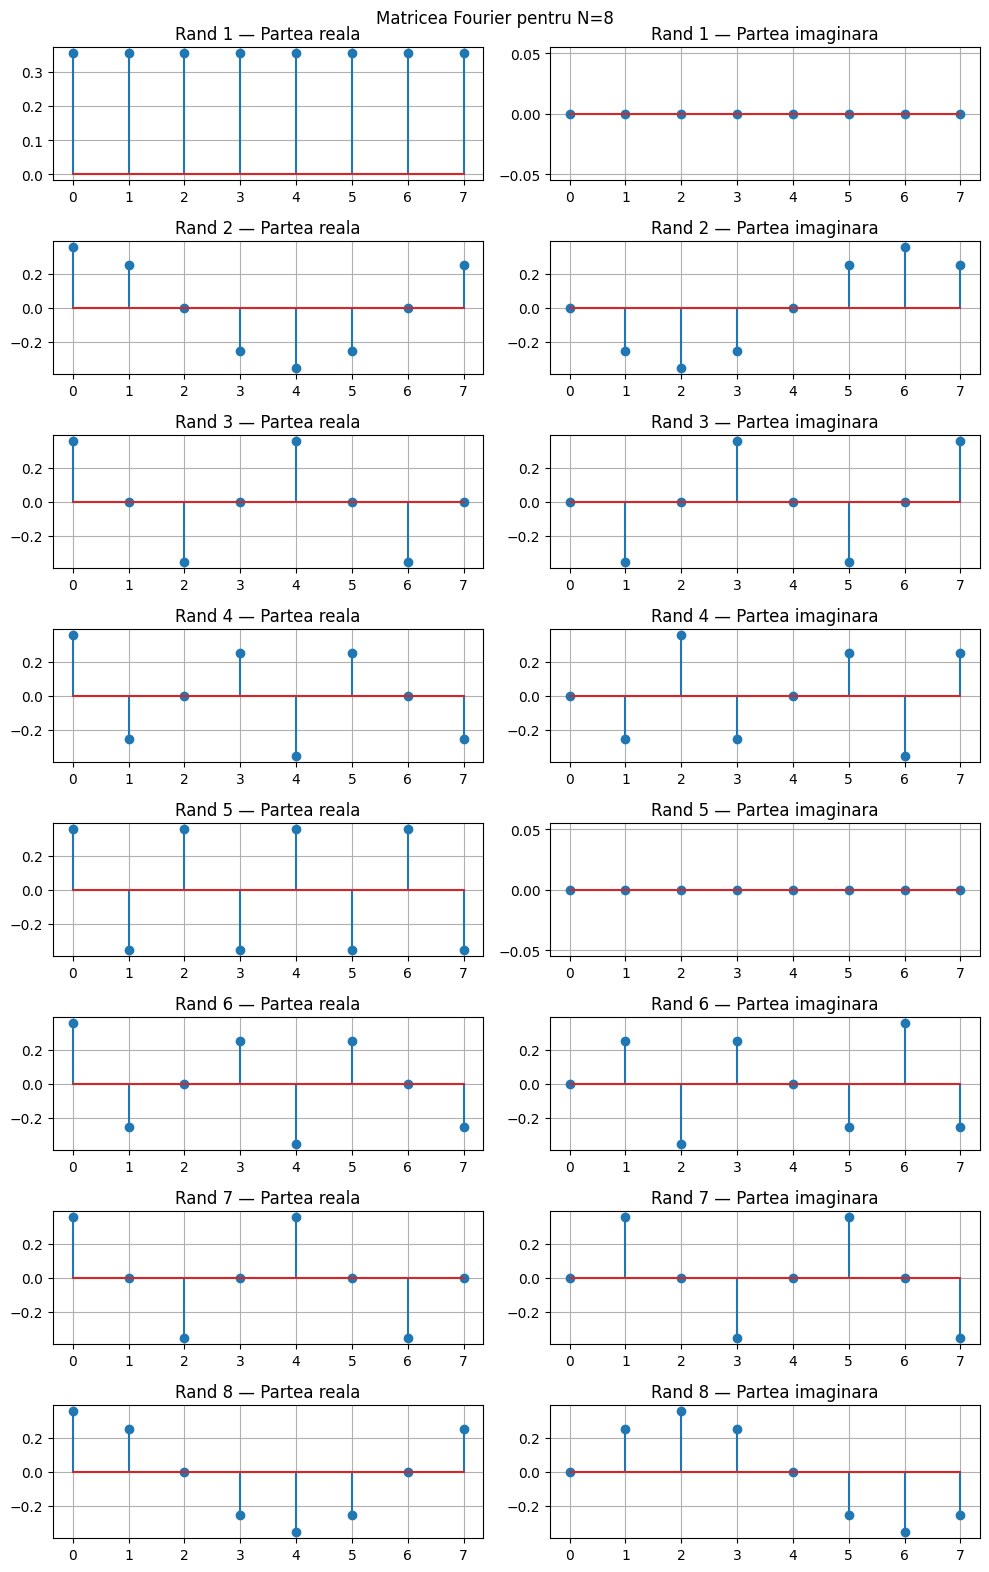

Matricea F este unitară:  True


In [44]:
N = 8
omega = math.e ** (-2j * numpy.pi  / N)
F = numpy.array([[omega ** (j * n) for j in range (N)] for n in range (N)]) / numpy.sqrt(N) # Crearea matricei Fourier normalizata print impartirea la numpy.sqrt(N)
print("Matrice Fouriere F de 8x8 normalizata:\n", F)

fig, axes = plt.subplots(N, 2, figsize=(10, 16))
fig.suptitle("Matricea Fourier pentru N=8")

for x in range(N):
    axes[x, 0].stem(F[x].real)
    axes[x, 0].set_title(f"Rand {x + 1} — Partea reala")
    axes[x, 0].grid(True)
    
    axes[x, 1].stem(F[x].imag)
    axes[x, 1].set_title(f"Rand {x + 1} — Partea imaginara")
    axes[x, 1].grid(True)
fig.tight_layout(rect=[0, 0, 1, 1]) # [left, bottom, right, top]
plt.savefig(fname = './reprezentare_matrice_Fourier.pdf', format = 'pdf')
plt.show()

# F ** H = F.conj().T -> transpus conjugat a lui F, @ inmultire matriceala, np.eye(N) -> matricea identitate
unitara = numpy.allclose(F.conj().T @ F, numpy.eye(N))
print("Matricea F este unitară: ", unitara)

Exercitiul 2

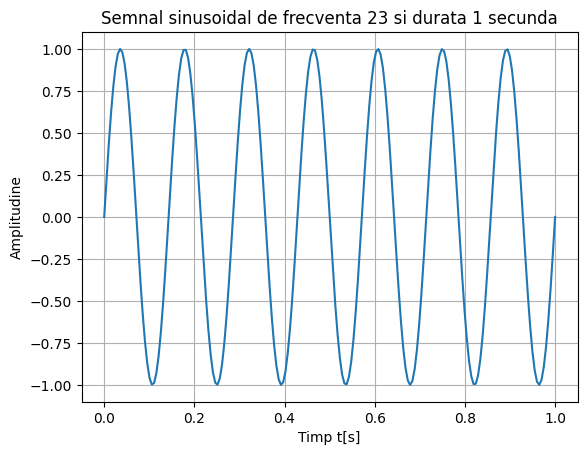

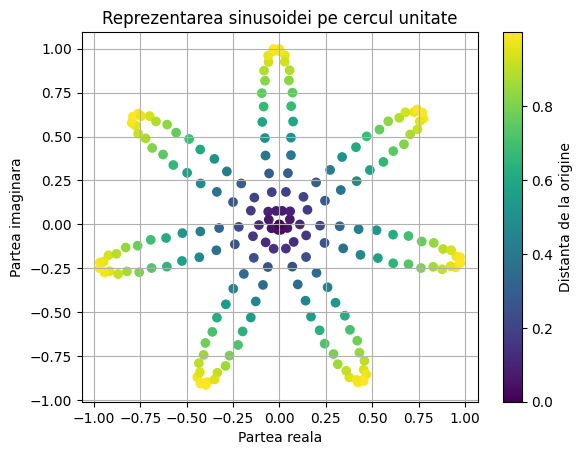

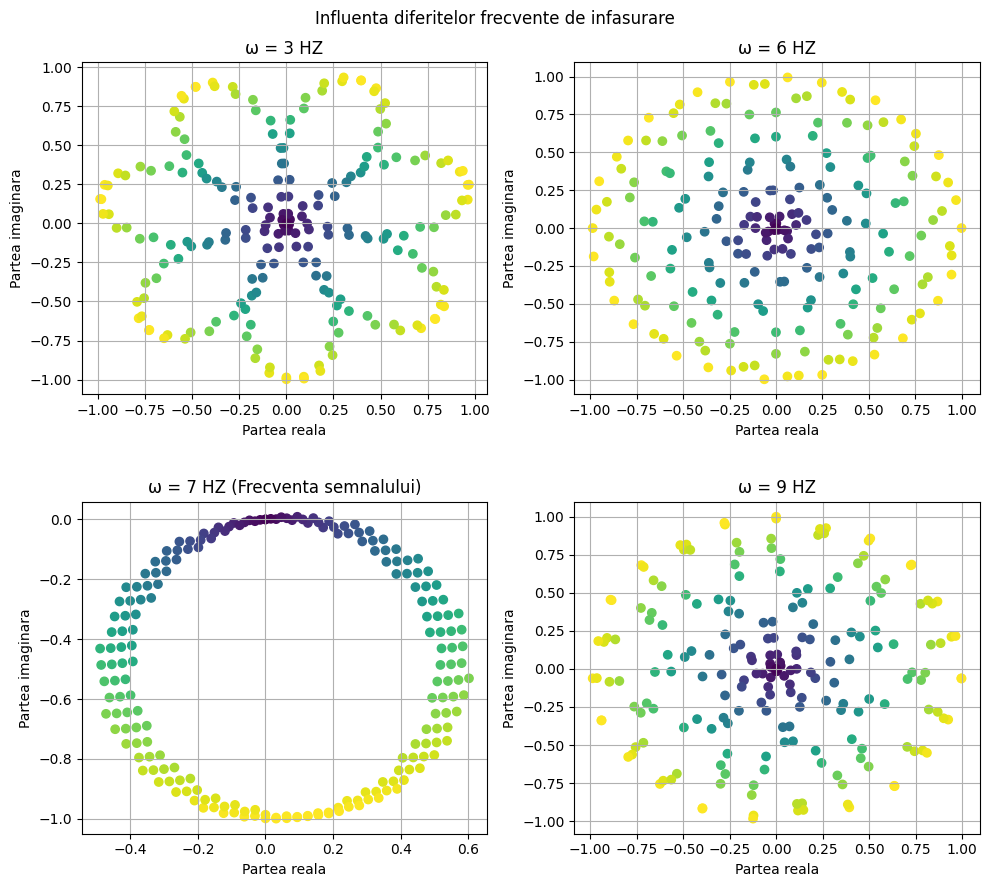

In [ ]:
frecventa = 7
frecventa_de_esantionare = 200
durata = 1
t = numpy.linspace(0,durata, int(durata * frecventa_de_esantionare))
semnal_sinus = numpy.sin(2 * numpy.pi * frecventa * t)
plt.plot(t, semnal_sinus)
plt.xlabel("Timp t[s]")
plt.ylabel("Amplitudine")
plt.title("Semnal sinusoidal de frecventa 23 si durata 1 secunda")
plt.grid(True)
plt.savefig(fname = './semnal_sinusoidal_7Hz.pdf', format = 'pdf')
plt.show()

N = len(semnal_sinus)
n = numpy.arange(N)
y = semnal_sinus * (math.e ** (-2j * numpy.pi * n / N))
plt.scatter(y.real, y.imag, c = numpy.abs(y), cmap = "viridis")
plt.xlabel("Partea reala")
plt.ylabel("Partea imaginara")
plt.grid(True)
plt.colorbar(label='Distanta de la origine')
plt.title("Reprezentarea sinusoidei pe cercul unitate")
plt.savefig(fname = './reprezentare_semnal_sinusoidal_cerc_unitate.pdf', format = 'pdf')
plt.show()

lista_omega = [3, 6, frecventa, 9]
fig, axes = plt.subplots(2, len(lista_omega) // 2, figsize = (10, 9))
fig.suptitle("Influenta diferitelor frecvente de infasurare")
for j, omega in  enumerate(lista_omega):
    z = semnal_sinus * (math.e ** (-2j * numpy.pi * omega * n / N))
    row = j // 2
    col = j % 2
    axes[row, col].scatter(z.real, z.imag, c = numpy.abs(z), cmap = 'viridis')
    if omega == frecventa:
        axes[row, col].set_title(f"ω = {omega} HZ (Frecventa semnalului)")
    else:
        axes[row, col].set_title(f"ω = {omega} HZ")
    axes[row, col].set_xlabel("Partea reala")
    axes[row, col].set_ylabel("Partea imaginara")
    axes[row, col].grid(True)
plt.tight_layout(rect=[0, 0, 1, 1], h_pad = 3)
plt.savefig(fname = './influenta_diferitelor_frecvente_de_infasurare.pdf', format = 'pdf')
plt.show()